In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import pandas as pd
import os
import pickle

In [10]:
# Run python 02_run_perf_all.py 

In [11]:
output_dir = './results'

output_time_dir = os.path.join(output_dir, "time")
output_n_subgroups_dir = os.path.join(output_dir, "n_subgroups")

In [12]:
print(sorted(['airbnb',  'bike', 'german', 'adult', 'heart', 'bank', 'compas', 'artificial', 'law']))

['adult', 'airbnb', 'artificial', 'bank', 'bike', 'compas', 'german', 'heart', 'law']


In [44]:
time_results, number_subgroups = {}, {}

dataset_rename = {'adult': 'adult', 'airbnb': 'airbnb NY', 'artificial': 'artificial', 'bank':'bank', 'bike': 'bike', 'compas': 'compas', 'folktables': 'folktables', 'german':'german', 'heart':'heart', 'law': 'law school'}

for dataset in ['adult', 'airbnb', 'artificial', 'bank', 'bike', 'compas', 'folktables', 'german', 'heart', 'law']:
    print(dataset)

    

    filename_time = os.path.join(output_time_dir, f"time_{dataset}.pkl")

    with open(filename_time, "rb") as f:
        time_results[dataset_rename[dataset]] = pickle.load(f)

    filename_n_subgroups = os.path.join( output_n_subgroups_dir, f"n_subgroups_{dataset}.pkl")

    with open(filename_n_subgroups, "rb") as f:
        number_subgroups[dataset_rename[dataset]] = pickle.load(f)

adult
airbnb
artificial
bank
bike
compas
folktables
german
heart
law


adult
airbnb NY
artificial
bank
bike
compas
folktables
german
heart
law school


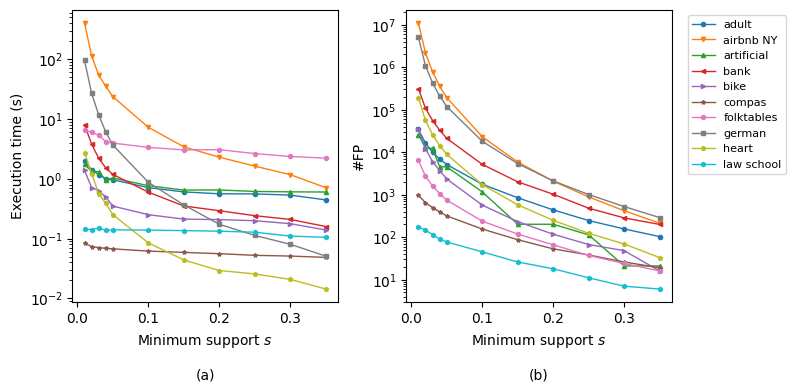

In [45]:
import matplotlib.pyplot as plt
m_i = 0
markersize = 3
linewidth = 1
label_size = 8
outside_legend = True
size_fig = (8,4)
xlabel = "Minimum support $s$"
markers=['o', 'v', '^', '<', '>', '*', '8', 's', 'p', 'h', 'H', 'D', 'd', 'P', 'X']
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=size_fig)


for dataset in time_results.keys():
    print(dataset)
    info_dicts_1 = time_results[dataset]
    info_dicts_1 = {k:info_dicts_1[k] for k in sorted(info_dicts_1)}
    info_dicts_2 = number_subgroups[dataset]
    info_dicts_2 = {k:info_dicts_2[k] for k in sorted(info_dicts_2)}
    ax1.plot(list(info_dicts_1.keys()), list(info_dicts_1.values()), label=dataset, marker=markers[m_i], linewidth=linewidth, markersize=markersize)
    ax2.plot(list(info_dicts_2.keys()), list(info_dicts_2.values()), label=dataset, marker=markers[m_i], linewidth=linewidth, markersize=markersize)
    m_i=m_i+1


    import cycler
    plt.rcParams['axes.prop_cycle'] =cycler.cycler(color=plt.get_cmap("tab10").colors)



    plt.rcParams["figure.figsize"], plt.rcParams["figure.dpi"] = size_fig, 100
    ax1.set_xlabel(f"{xlabel}\n\n(a)")
    ax2.set_xlabel(f"{xlabel}\n\n(b)")
    ax1.set_yscale("log")
    ax2.set_yscale("log")
    # ax1.set_title("Execution time")
    # ax2.set_title("#FP")
    ax1.set_ylabel('Execution time (s)')
    ax2.set_ylabel('#FP')

    fig.tight_layout(pad=1)
    if outside_legend:
        ax2.legend(prop={'size': label_size}, bbox_to_anchor=(1.04,1), loc="upper left", fontsize=5, title_fontsize=5)#, title="dataset",

plt.savefig(f"./time_FP.pdf", bbox_inches='tight')
plt.show()
plt.close()

In [29]:
[d for d in time_results if max(time_results[d].values()) >= 10]

['airbnb NY', 'german']

In [15]:
[i/60 for i in list(time_results['airbnb'].values())]

[6.657530045509338,
 1.892210300763448,
 0.8965032577514649,
 0.5833280881245931,
 0.3919735272725423,
 0.12044893105824789,
 0.056905722618103026,
 0.0382029930750529,
 0.02708402872085571,
 0.01949928601582845,
 0.01185374657313029]

## Load redundancy

In [30]:
output_red_dir = f'{output_dir}/redundancy_pruning/n_subgroups'


number_subgroups_red = {}


for dataset in [ 'airbnb', 'bike']:
    print(dataset)

    filename_n_subgroups = os.path.join( output_red_dir, f"n_subgroups_{dataset}.pkl")

    with open(filename_n_subgroups, "rb") as f:
        number_subgroups_red[dataset] = pickle.load(f)

airbnb
bike


None None
0.001 0.1
0.005 0.5
0.01 1.0
0.025 2.5
0.05 5.0


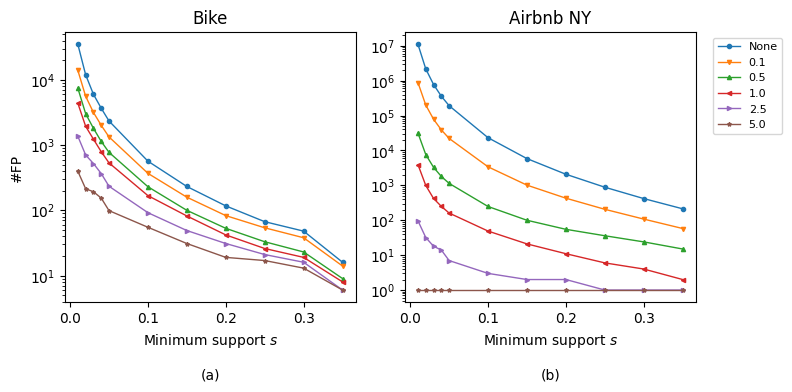

In [42]:
import matplotlib.pyplot as plt
m_i = 0
markersize = 3
linewidth = 1
label_size = 8
outside_legend = True
size_fig = (8,4)
xlabel = "Minimum support $s$"
markers=['o', 'v', '^', '<', '>', '*', '8', 's', 'p', 'h', 'H', 'D', 'd', 'P', 'X']
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=size_fig)

results_d1 = number_subgroups_red['bike']
results_d2 = number_subgroups_red['airbnb']

thresholds = ['None', '0.001', '0.005', '0.01', '0.025', '0.05'] #, '0.075']
#list_info_2={th*100 if th!="None" else "None":{sup:info2[sup][th].loc[metric][0] for sup in sorted(info2.keys()) if sup in info2 and info2[sup]!={} and th in info2[sup]} for th in th_redundancy}

for th in thresholds:
    info_dicts_1 = results_d1[th]
    info_dicts_1 = {k:info_dicts_1[k] for k in sorted(info_dicts_1)}
    info_dicts_2 = results_d2[th]
    info_dicts_2 = {k:info_dicts_2[k] for k in sorted(info_dicts_2)}
    th_label_name = th if th == "None" else float(th)*100
    print(th, th_label_name)
    ax1.plot(list(info_dicts_1.keys()), list(info_dicts_1.values()), label=th_label_name, marker=markers[m_i], linewidth=linewidth, markersize=markersize)
    ax2.plot(list(info_dicts_2.keys()), list(info_dicts_2.values()), label=th_label_name, marker=markers[m_i], linewidth=linewidth, markersize=markersize)
    m_i=m_i+1


    import cycler
    plt.rcParams['axes.prop_cycle'] =cycler.cycler(color=plt.get_cmap("tab10").colors)



    plt.rcParams["figure.figsize"], plt.rcParams["figure.dpi"] = size_fig, 100
    ax1.set_xlabel(f"{xlabel}\n\n(a)")
    ax2.set_xlabel(f"{xlabel}\n\n(b)")
    ax1.set_yscale("log")
    ax2.set_yscale("log")
    # ax1.set_title("Execution time")
    # ax2.set_title("#FP")
    ax1.set_title('Bike')
    ax2.set_title('Airbnb NY')
    ax1.set_ylabel('#FP')

    fig.tight_layout(pad=1)
    if outside_legend:
        ax2.legend(prop={'size': label_size}, bbox_to_anchor=(1.04,1), loc="upper left", fontsize=5, title_fontsize=5)#, title="dataset",

plt.savefig(f"./redundancy_FP.pdf", bbox_inches='tight')
plt.show()
plt.close()

In [43]:
print(number_subgroups_red['bike']['0.005'])

{0.01: 7448, 0.02: 3028, 0.03: 1809, 0.04: 1140, 0.05: 774, 0.1: 230, 0.15: 100, 0.2: 53, 0.25: 33, 0.3: 23, 0.35: 9}
